In [146]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [147]:
spotifydf = pd.read_csv('Model_Data.csv')
spotifydf

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity_over75
0,0.88100,0.644,313.093,0.212,0,0.000022,11,0.7980,-14.118,1,0.0347,117.072,0.441,0
1,0.95500,0.627,295.093,0.184,0,0.000162,1,0.0986,-15.533,1,0.0450,115.864,0.299,0
2,0.88800,0.581,183.440,0.331,0,0.000015,6,0.1470,-14.087,1,0.2430,88.303,0.642,0
3,0.93000,0.442,147.907,0.399,0,0.000499,6,0.9120,-12.661,1,0.0780,121.662,0.554,0
4,0.94900,0.570,64.173,0.176,0,0.000000,6,0.1470,-22.676,0,0.2990,135.687,0.348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4289,0.04840,0.693,177.148,0.826,0,0.000012,1,0.2310,-2.669,1,0.0762,126.049,0.361,0
4290,0.14100,0.544,215.014,0.407,1,0.000000,4,0.2530,-12.745,0,0.2330,129.750,0.490,0
4291,0.00917,0.792,147.615,0.866,0,0.000060,6,0.1780,-5.089,0,0.0356,125.972,0.186,0
4292,0.80600,0.671,218.147,0.589,0,0.920000,4,0.1130,-12.393,0,0.0282,108.058,0.714,0


In [226]:
spotify_popular = spotifydf[spotifydf["popularity_over75"] == 1]
spotify_popular

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity_over75
156,0.22100,0.700,140.526,0.722,1,0.000000,7,0.2720,-3.558,0,0.0369,90.989,0.756,1
158,0.49900,0.436,279.204,0.655,1,0.000008,1,0.6880,-8.370,0,0.0583,121.002,0.412,1
160,0.46800,0.737,172.325,0.802,1,0.000000,0,0.0931,-4.771,1,0.0878,144.015,0.682,1
162,0.23700,0.830,173.711,0.585,1,0.000000,0,0.2480,-6.476,1,0.0940,109.978,0.485,1
164,0.19000,0.711,123.429,0.598,1,0.000000,3,0.1500,-7.621,0,0.1820,140.175,0.737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166,0.40700,0.626,179.746,0.503,0,0.000000,10,0.2340,-5.087,1,0.1410,72.985,0.821,1
4168,0.15700,0.820,189.287,0.842,0,0.000000,7,0.1120,-3.853,1,0.2720,107.952,0.653,1
4186,0.00795,0.809,191.242,0.911,0,0.000179,6,0.1810,-4.410,0,0.0617,122.035,0.640,1
4200,0.24300,0.795,171.375,0.480,0,0.000000,3,0.2710,-8.556,1,0.0688,149.919,0.723,1


In [229]:
spotifydf = spotifydf.append(spotify_popular, ignore_index=True)
spotifydf

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity_over75
0,0.88100,0.644,313.093,0.212,0,0.000022,11,0.7980,-14.118,1,0.0347,117.072,0.441,0
1,0.95500,0.627,295.093,0.184,0,0.000162,1,0.0986,-15.533,1,0.0450,115.864,0.299,0
2,0.88800,0.581,183.440,0.331,0,0.000015,6,0.1470,-14.087,1,0.2430,88.303,0.642,0
3,0.93000,0.442,147.907,0.399,0,0.000499,6,0.9120,-12.661,1,0.0780,121.662,0.554,0
4,0.94900,0.570,64.173,0.176,0,0.000000,6,0.1470,-22.676,0,0.2990,135.687,0.348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,0.40700,0.626,179.746,0.503,0,0.000000,10,0.2340,-5.087,1,0.1410,72.985,0.821,1
4802,0.15700,0.820,189.287,0.842,0,0.000000,7,0.1120,-3.853,1,0.2720,107.952,0.653,1
4803,0.00795,0.809,191.242,0.911,0,0.000179,6,0.1810,-4.410,0,0.0617,122.035,0.640,1
4804,0.24300,0.795,171.375,0.480,0,0.000000,3,0.2710,-8.556,1,0.0688,149.919,0.723,1


In [230]:
spotifydf = spotifydf.append(spotify_popular, ignore_index=True)
spotifydf

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity_over75
0,0.88100,0.644,313.093,0.212,0,0.000022,11,0.7980,-14.118,1,0.0347,117.072,0.441,0
1,0.95500,0.627,295.093,0.184,0,0.000162,1,0.0986,-15.533,1,0.0450,115.864,0.299,0
2,0.88800,0.581,183.440,0.331,0,0.000015,6,0.1470,-14.087,1,0.2430,88.303,0.642,0
3,0.93000,0.442,147.907,0.399,0,0.000499,6,0.9120,-12.661,1,0.0780,121.662,0.554,0
4,0.94900,0.570,64.173,0.176,0,0.000000,6,0.1470,-22.676,0,0.2990,135.687,0.348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5313,0.40700,0.626,179.746,0.503,0,0.000000,10,0.2340,-5.087,1,0.1410,72.985,0.821,1
5314,0.15700,0.820,189.287,0.842,0,0.000000,7,0.1120,-3.853,1,0.2720,107.952,0.653,1
5315,0.00795,0.809,191.242,0.911,0,0.000179,6,0.1810,-4.410,0,0.0617,122.035,0.640,1
5316,0.24300,0.795,171.375,0.480,0,0.000000,3,0.2710,-8.556,1,0.0688,149.919,0.723,1


In [231]:
spotifydf = spotifydf.append(spotify_popular, ignore_index=True)
spotifydf

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity_over75
0,0.88100,0.644,313.093,0.212,0,0.000022,11,0.7980,-14.118,1,0.0347,117.072,0.441,0
1,0.95500,0.627,295.093,0.184,0,0.000162,1,0.0986,-15.533,1,0.0450,115.864,0.299,0
2,0.88800,0.581,183.440,0.331,0,0.000015,6,0.1470,-14.087,1,0.2430,88.303,0.642,0
3,0.93000,0.442,147.907,0.399,0,0.000499,6,0.9120,-12.661,1,0.0780,121.662,0.554,0
4,0.94900,0.570,64.173,0.176,0,0.000000,6,0.1470,-22.676,0,0.2990,135.687,0.348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5825,0.40700,0.626,179.746,0.503,0,0.000000,10,0.2340,-5.087,1,0.1410,72.985,0.821,1
5826,0.15700,0.820,189.287,0.842,0,0.000000,7,0.1120,-3.853,1,0.2720,107.952,0.653,1
5827,0.00795,0.809,191.242,0.911,0,0.000179,6,0.1810,-4.410,0,0.0617,122.035,0.640,1
5828,0.24300,0.795,171.375,0.480,0,0.000000,3,0.2710,-8.556,1,0.0688,149.919,0.723,1


In [232]:
spotifydf = spotifydf.append(spotify_popular, ignore_index=True)
spotifydf

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity_over75
0,0.88100,0.644,313.093,0.212,0,0.000022,11,0.7980,-14.118,1,0.0347,117.072,0.441,0
1,0.95500,0.627,295.093,0.184,0,0.000162,1,0.0986,-15.533,1,0.0450,115.864,0.299,0
2,0.88800,0.581,183.440,0.331,0,0.000015,6,0.1470,-14.087,1,0.2430,88.303,0.642,0
3,0.93000,0.442,147.907,0.399,0,0.000499,6,0.9120,-12.661,1,0.0780,121.662,0.554,0
4,0.94900,0.570,64.173,0.176,0,0.000000,6,0.1470,-22.676,0,0.2990,135.687,0.348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6337,0.40700,0.626,179.746,0.503,0,0.000000,10,0.2340,-5.087,1,0.1410,72.985,0.821,1
6338,0.15700,0.820,189.287,0.842,0,0.000000,7,0.1120,-3.853,1,0.2720,107.952,0.653,1
6339,0.00795,0.809,191.242,0.911,0,0.000179,6,0.1810,-4.410,0,0.0617,122.035,0.640,1
6340,0.24300,0.795,171.375,0.480,0,0.000000,3,0.2710,-8.556,1,0.0688,149.919,0.723,1


In [233]:
spotifydf = spotifydf.append(spotify_popular, ignore_index=True)
spotifydf

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity_over75
0,0.88100,0.644,313.093,0.212,0,0.000022,11,0.7980,-14.118,1,0.0347,117.072,0.441,0
1,0.95500,0.627,295.093,0.184,0,0.000162,1,0.0986,-15.533,1,0.0450,115.864,0.299,0
2,0.88800,0.581,183.440,0.331,0,0.000015,6,0.1470,-14.087,1,0.2430,88.303,0.642,0
3,0.93000,0.442,147.907,0.399,0,0.000499,6,0.9120,-12.661,1,0.0780,121.662,0.554,0
4,0.94900,0.570,64.173,0.176,0,0.000000,6,0.1470,-22.676,0,0.2990,135.687,0.348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6849,0.40700,0.626,179.746,0.503,0,0.000000,10,0.2340,-5.087,1,0.1410,72.985,0.821,1
6850,0.15700,0.820,189.287,0.842,0,0.000000,7,0.1120,-3.853,1,0.2720,107.952,0.653,1
6851,0.00795,0.809,191.242,0.911,0,0.000179,6,0.1810,-4.410,0,0.0617,122.035,0.640,1
6852,0.24300,0.795,171.375,0.480,0,0.000000,3,0.2710,-8.556,1,0.0688,149.919,0.723,1


In [234]:
spotify_popular_update = spotifydf[spotifydf["popularity_over75"] == 1]
spotify_popular_update

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity_over75
156,0.22100,0.700,140.526,0.722,1,0.000000,7,0.2720,-3.558,0,0.0369,90.989,0.756,1
158,0.49900,0.436,279.204,0.655,1,0.000008,1,0.6880,-8.370,0,0.0583,121.002,0.412,1
160,0.46800,0.737,172.325,0.802,1,0.000000,0,0.0931,-4.771,1,0.0878,144.015,0.682,1
162,0.23700,0.830,173.711,0.585,1,0.000000,0,0.2480,-6.476,1,0.0940,109.978,0.485,1
164,0.19000,0.711,123.429,0.598,1,0.000000,3,0.1500,-7.621,0,0.1820,140.175,0.737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6849,0.40700,0.626,179.746,0.503,0,0.000000,10,0.2340,-5.087,1,0.1410,72.985,0.821,1
6850,0.15700,0.820,189.287,0.842,0,0.000000,7,0.1120,-3.853,1,0.2720,107.952,0.653,1
6851,0.00795,0.809,191.242,0.911,0,0.000179,6,0.1810,-4.410,0,0.0617,122.035,0.640,1
6852,0.24300,0.795,171.375,0.480,0,0.000000,3,0.2710,-8.556,1,0.0688,149.919,0.723,1


In [235]:
#Set up Model
target = spotifydf["popularity_over75"]
target_names = ["not popular", "popular"]

In [236]:
data = spotifydf.drop("popularity_over75", axis=1)
feature_names = data.columns
data.head()

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.881,0.644,313.093,0.212,0,0.000022,11,0.7980,-14.118,1,0.0347,117.072,0.441
1,0.955,0.627,295.093,0.184,0,0.000162,1,0.0986,-15.533,1,0.0450,115.864,0.299
2,0.888,0.581,183.440,0.331,0,0.000015,6,0.1470,-14.087,1,0.2430,88.303,0.642
3,0.930,0.442,147.907,0.399,0,0.000499,6,0.9120,-12.661,1,0.0780,121.662,0.554
4,0.949,0.570,64.173,0.176,0,0.000000,6,0.1470,-22.676,0,0.2990,135.687,0.348


In [237]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [238]:
model = RandomForestClassifier(n_estimators=1000)
rf = model.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9635302698760029

In [239]:
y_predicted = model.predict(X_test)

In [240]:
f1_score(y_test, y_predicted)

0.9611801242236024

In [241]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[702,  50],
       [  0, 619]], dtype=int64)

Text(69.0, 0.5, 'Truth')

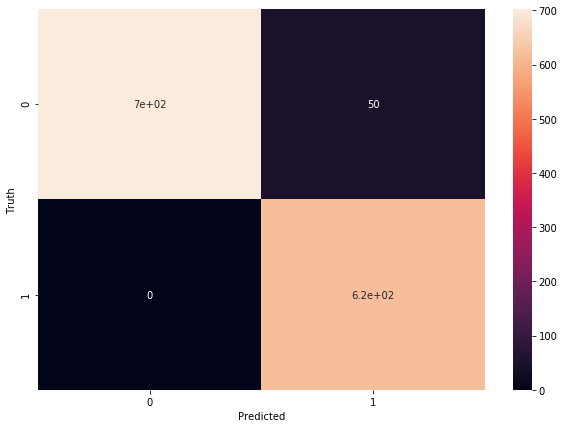

In [242]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [243]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.17852945421479682, 'instrumentalness'),
 (0.11269962889498049, 'duration_s'),
 (0.09097793429982487, 'acousticness'),
 (0.0900132489699413, 'loudness'),
 (0.08461240121779948, 'explicit'),
 (0.08046106080692908, 'danceability'),
 (0.07476167481791349, 'energy'),
 (0.0700776061260878, 'speechiness'),
 (0.0684417773010978, 'liveness'),
 (0.05831184945937106, 'valence'),
 (0.055700681486689566, 'tempo'),
 (0.02856321370337392, 'key'),
 (0.006849468701194405, 'mode')]

In [244]:
#Remove key and mode and re check model
data2 = spotifydf.drop(columns=['mode', 'key', 'popularity_over75'], axis=1)
feature_names = data2.columns
data2.head()

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.881,0.644,313.093,0.212,0,0.000022,0.7980,-14.118,0.0347,117.072,0.441
1,0.955,0.627,295.093,0.184,0,0.000162,0.0986,-15.533,0.0450,115.864,0.299
2,0.888,0.581,183.440,0.331,0,0.000015,0.1470,-14.087,0.2430,88.303,0.642
3,0.930,0.442,147.907,0.399,0,0.000499,0.9120,-12.661,0.0780,121.662,0.554
4,0.949,0.570,64.173,0.176,0,0.000000,0.1470,-22.676,0.2990,135.687,0.348


In [245]:
X_train1, X_test1, y_train, y_test = train_test_split(data2, target, test_size=0.2, random_state = 1)

In [246]:
model2 = RandomForestClassifier(n_estimators=10)
rf = model2.fit(X_train1, y_train)
rf.score(X_test1, y_test)

0.9679066374908826

In [247]:
y_predicted1 = model2.predict(X_test1)

In [251]:
f1_score(y_test, y_predicted1,)

0.9658385093167703

In [252]:
cm1 = confusion_matrix(y_test, y_predicted1)
cm1

array([[705,  41],
       [  3, 622]], dtype=int64)

Text(69.0, 0.5, 'Truth')

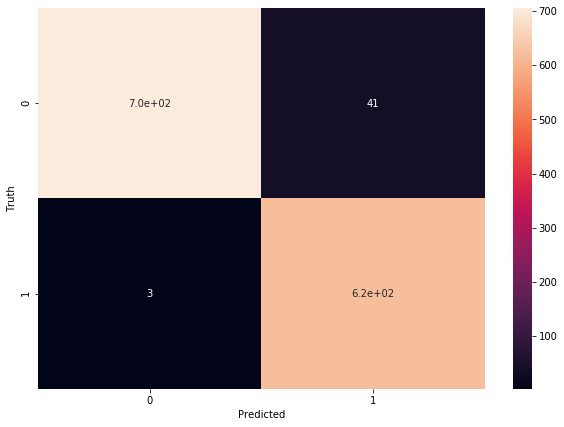

In [253]:
plt.figure(figsize=(10,7))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [254]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.15965498383943844, 'instrumentalness'),
 (0.10716174896429477, 'duration_s'),
 (0.10322558003025019, 'explicit'),
 (0.09899722266479348, 'acousticness'),
 (0.09198610431879904, 'loudness'),
 (0.08537963027908983, 'energy'),
 (0.08167120447018317, 'danceability'),
 (0.07738872076536059, 'liveness'),
 (0.07617304342832319, 'speechiness'),
 (0.06207301507124021, 'valence'),
 (0.05628874616822716, 'tempo')]

In [270]:
model2.predict([[1,0.761,100,0.518,1,0.0000347,0.107,-8.871, 0.134, 133.976, 0.522]])

array([0], dtype=int64)

In [260]:
spotify_popular_update = spotifydf[spotifydf["popularity_over75"] == 1]
spotify_popular_update

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity_over75
156,0.22100,0.700,140.526,0.722,1,0.000000,7,0.2720,-3.558,0,0.0369,90.989,0.756,1
158,0.49900,0.436,279.204,0.655,1,0.000008,1,0.6880,-8.370,0,0.0583,121.002,0.412,1
160,0.46800,0.737,172.325,0.802,1,0.000000,0,0.0931,-4.771,1,0.0878,144.015,0.682,1
162,0.23700,0.830,173.711,0.585,1,0.000000,0,0.2480,-6.476,1,0.0940,109.978,0.485,1
164,0.19000,0.711,123.429,0.598,1,0.000000,3,0.1500,-7.621,0,0.1820,140.175,0.737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6849,0.40700,0.626,179.746,0.503,0,0.000000,10,0.2340,-5.087,1,0.1410,72.985,0.821,1
6850,0.15700,0.820,189.287,0.842,0,0.000000,7,0.1120,-3.853,1,0.2720,107.952,0.653,1
6851,0.00795,0.809,191.242,0.911,0,0.000179,6,0.1810,-4.410,0,0.0617,122.035,0.640,1
6852,0.24300,0.795,171.375,0.480,0,0.000000,3,0.2710,-8.556,1,0.0688,149.919,0.723,1


In [273]:
import pickle

pickle.dump(model2, open('spotify_model', 'wb'))